In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
import datetime
pd.options.plotting.backend = "plotly"
from plotly.offline import iplot
import cufflinks
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

In [2]:
roberta_bt=pd.read_csv('/content/roberta_bt.csv')

In [3]:
roberta_bt.set_index('Date',inplace=True)

In [4]:
roberta_bt.sort_index(ascending=True,inplace=True)

In [5]:
roberta_1=roberta_bt.copy()
roberta_1

,Open,High,Low,Close,Change,Volume,sentiments,sent_positions
Date,,,,,,,,
2008-02-12,6641.67,6641.79,6641.67,6641.75,0.06,197300.0,-0.600000,-1
2008-03-12,6641.74,6641.84,6641.44,6641.80,0.05,41200.0,0.500000,1
2008-05-12,6641.68,6641.75,6641.18,6641.75,0.07,41700.0,-0.400000,-1
2008-12-12,6641.68,6641.78,6641.65,6641.77,0.02,56000.0,-0.333333,-1
2008-12-15,6638.75,6638.75,6389.69,6389.69,-252.08,17890248.0,0.200000,1
...,...,...,...,...,...,...,...,...
2020-12-28,30471.63,30657.47,30444.49,30601.75,157.26,463381581.0,-0.600000,-1
2020-12-30,30442.90,30777.53,30424.10,30733.89,309.79,455962479.0,-0.444444,-1
2020-12-31,30792.39,30845.66,30694.60,30779.70,45.81,578245258.0,-0.038462,-1


In [6]:
#Calculating  Returns
roberta_1['Returns']=roberta_1.pct_change()['Close']
roberta_1['Log_Returns']=np.log(1+roberta_1['Returns'])
roberta_1.dropna(inplace=True)

In [7]:
roberta_1['Buy']=np.where(roberta_1.sent_positions>0,roberta_1['Close'],np.nan)
roberta_1['Sell']=np.where(roberta_1.sent_positions<0,roberta_1['Close'],np.nan)

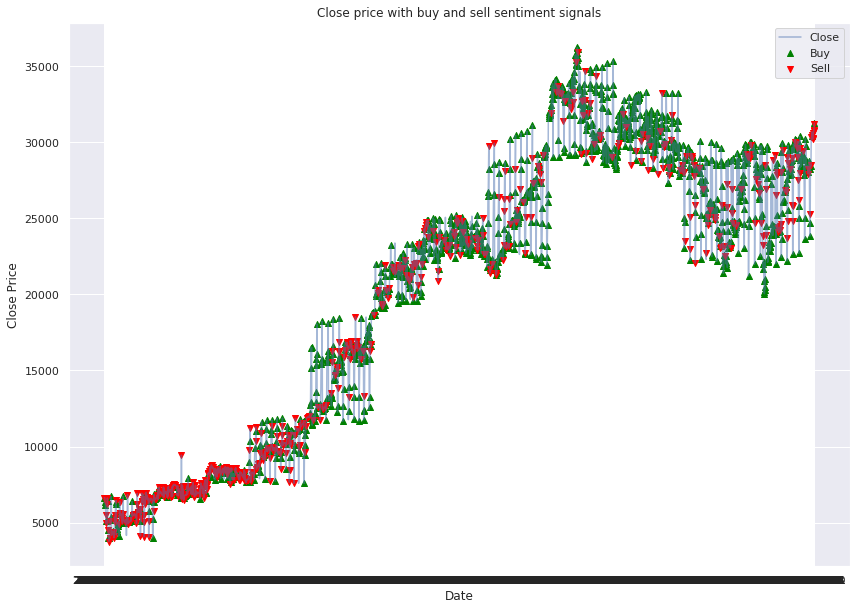

In [8]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_1['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_1.index,roberta_1['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_1.index,roberta_1['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [9]:
returns=roberta_1.sent_positions.shift(1)*roberta_1.Log_Returns

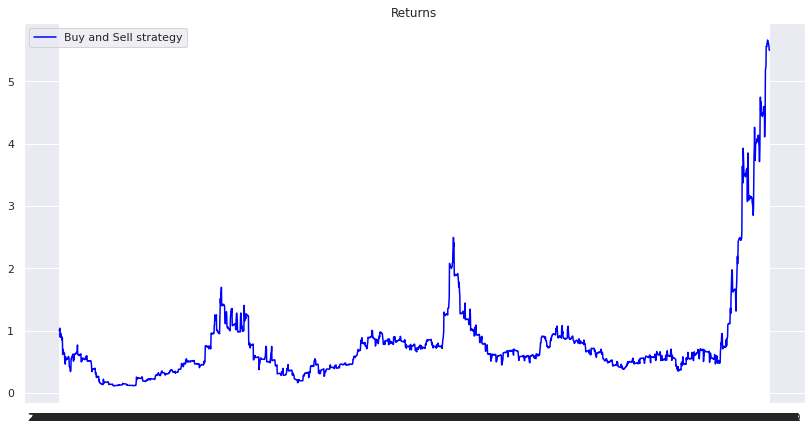

In [10]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [11]:
print('Buy and Sell strategy Returns:',np.exp(returns.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: 4.4974385280915055


#### Changing Threshold to 0.05

In [12]:
roberta_2=roberta_bt.copy()

In [13]:
roberta_2.drop(columns=['sent_positions'],inplace=True)

In [14]:
def sentimentPositions(val, thresh,short=True):
    if val > thresh:
        return 1
    elif val<= -thresh and short:
        return -1
    else:
        return 0

In [15]:
roberta_2['sent_positions'] = roberta_2['sentiments'].apply(lambda x:sentimentPositions(x,thresh=0.05,
                                                                   short=True))

In [16]:
#Calculating  Returns
roberta_2['Returns']=roberta_2.pct_change()['Close']
roberta_2['Log_Returns']=np.log(1+roberta_2['Returns'])
roberta_2.dropna(inplace=True)

In [17]:
roberta_2['Buy']=np.where(roberta_2.sent_positions>0,roberta_2['Close'],np.nan)
roberta_2['Sell']=np.where(roberta_2.sent_positions<0,roberta_2['Close'],np.nan)

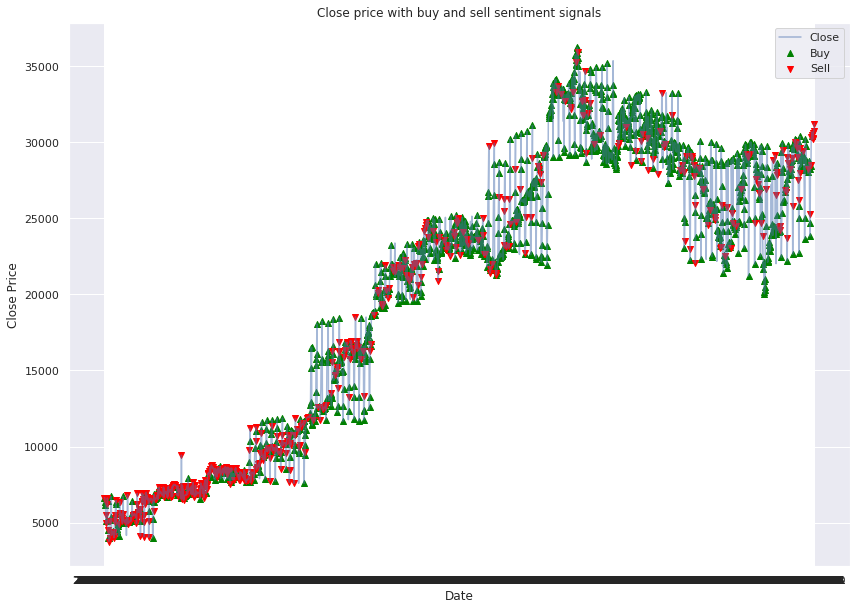

In [18]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_2['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_2.index,roberta_2['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_2.index,roberta_2['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [19]:
returns_1=roberta_2.sent_positions.shift(1)*roberta_2.Log_Returns

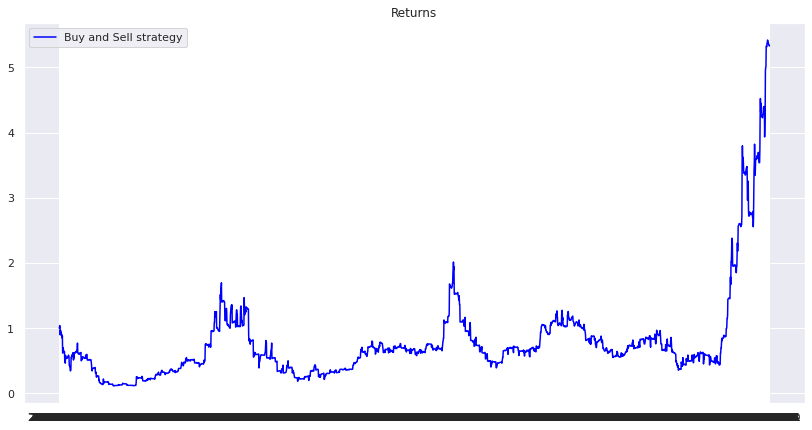

In [20]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns_1.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [21]:
print('Buy and Sell strategy Returns:',np.exp(returns_1.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: 4.3294293290139345


### Changing threshold to 0.10

In [22]:
roberta_3=roberta_bt.copy()

In [23]:
roberta_3.drop(columns=['sent_positions'],inplace=True)

In [24]:
roberta_3['sent_positions'] = roberta_3['sentiments'].apply(lambda x:sentimentPositions(x,thresh=0.10,
                                                                   short=True))

In [25]:
#Calculating  Returns
roberta_3['Returns']=roberta_3.pct_change()['Close']
roberta_3['Log_Returns']=np.log(1+roberta_3['Returns'])
roberta_3.dropna(inplace=True)

In [26]:
roberta_3['Buy']=np.where(roberta_3.sent_positions>0,roberta_3['Close'],np.nan)
roberta_3['Sell']=np.where(roberta_3.sent_positions<0,roberta_3['Close'],np.nan)

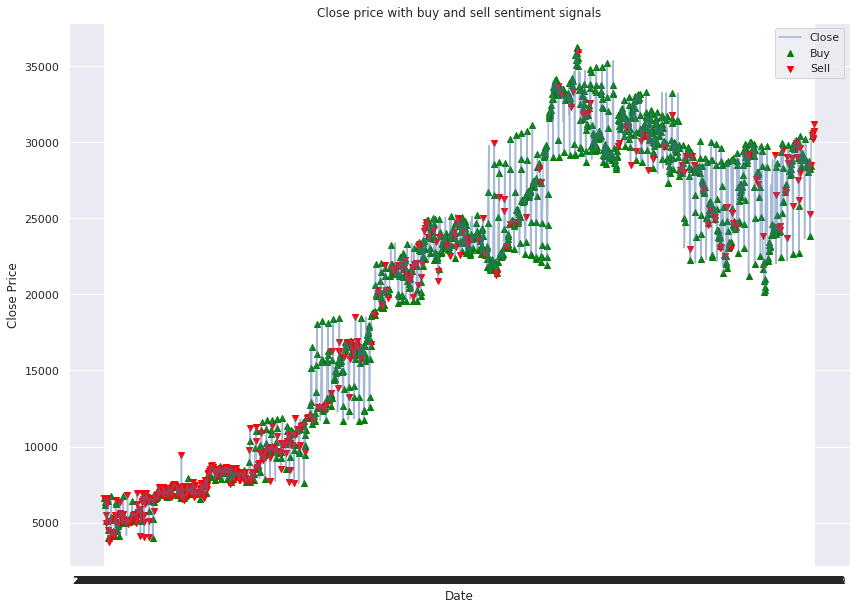

In [27]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_3['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_3.index,roberta_3['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_3.index,roberta_3['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [28]:
returns_3=roberta_3.sent_positions.shift(1)*roberta_3.Log_Returns

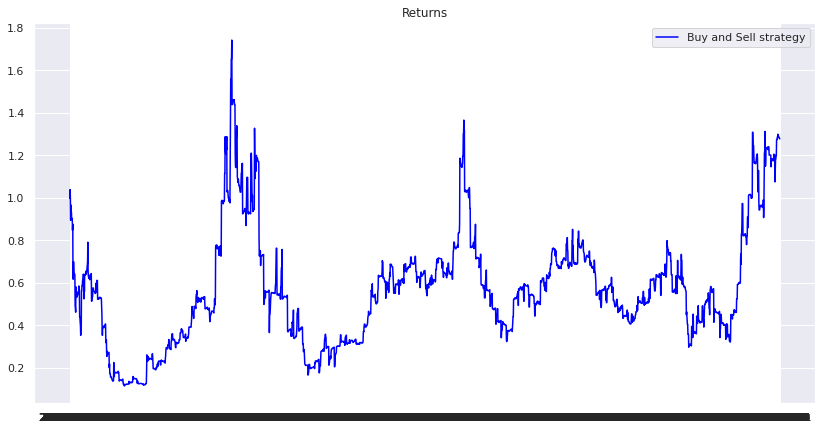

In [29]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns_3.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [30]:
print('Buy and Sell strategy Returns:',np.exp(returns_3.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: 0.2779592806573037


### Changing Threshold to 0.15

In [31]:
roberta_4=roberta_bt.copy()

In [32]:
roberta_4.drop(columns=['sent_positions'],inplace=True)

In [33]:
roberta_4['sent_positions'] = roberta_4['sentiments'].apply(lambda x:sentimentPositions(x,thresh=0.15,
                                                                   short=True))

In [34]:
#Calculating  Returns
roberta_4['Returns']=roberta_4.pct_change()['Close']
roberta_4['Log_Returns']=np.log(1+roberta_4['Returns'])
roberta_4.dropna(inplace=True)

In [35]:
roberta_4['Buy']=np.where(roberta_4.sent_positions>0,roberta_4['Close'],np.nan)
roberta_4['Sell']=np.where(roberta_4.sent_positions<0,roberta_4['Close'],np.nan)

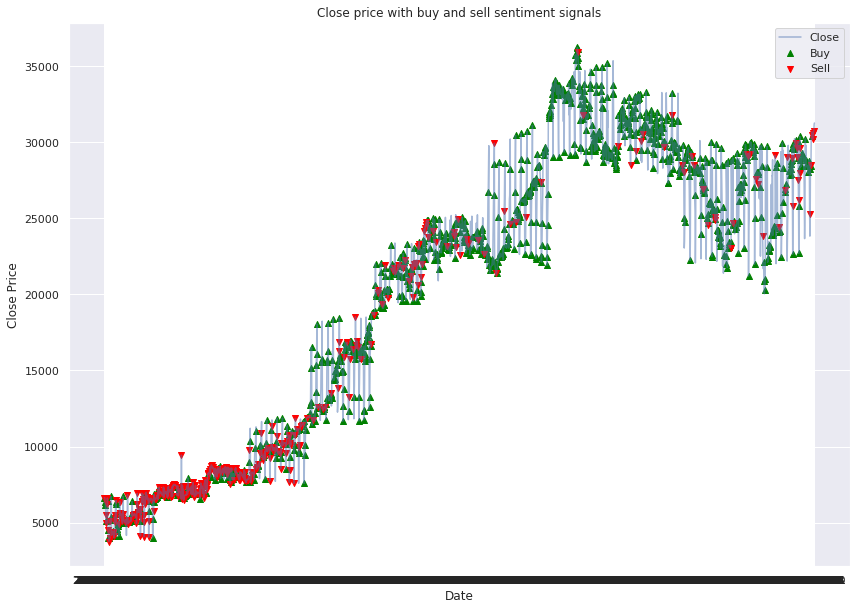

In [36]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_4['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_4.index,roberta_4['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_4.index,roberta_4['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [37]:
returns_4=roberta_4.sent_positions.shift(1)*roberta_4.Log_Returns

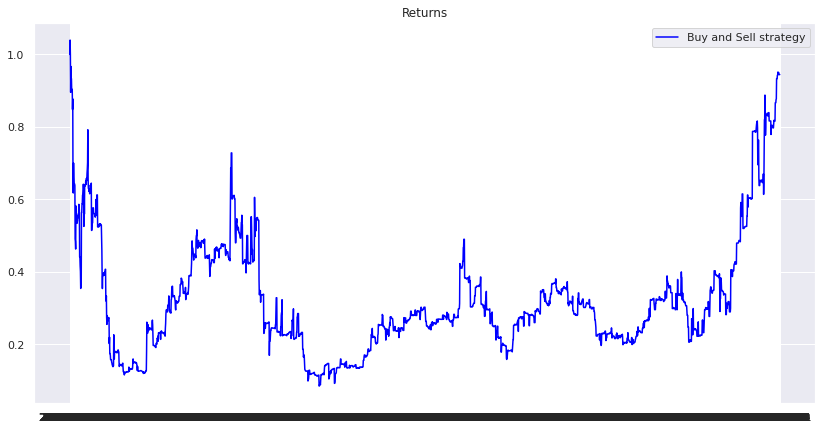

In [38]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns_4.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [39]:
print('Buy and Sell strategy Returns:',np.exp(returns_4.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: -0.05586149470718804


### Threshold 0.20

In [40]:
roberta_5=roberta_bt.copy()

In [41]:
roberta_5.drop(columns=['sent_positions'],inplace=True)

In [42]:
roberta_5['sent_positions'] = roberta_5['sentiments'].apply(lambda x:sentimentPositions(x,thresh=0.20,
                                                                   short=True))

In [43]:
#Calculating  Returns
roberta_5['Returns']=roberta_5.pct_change()['Close']
roberta_5['Log_Returns']=np.log(1+roberta_5['Returns'])
roberta_5.dropna(inplace=True)

In [44]:
roberta_5['Buy']=np.where(roberta_5.sent_positions>0,roberta_5['Close'],np.nan)
roberta_5['Sell']=np.where(roberta_5.sent_positions<0,roberta_5['Close'],np.nan)

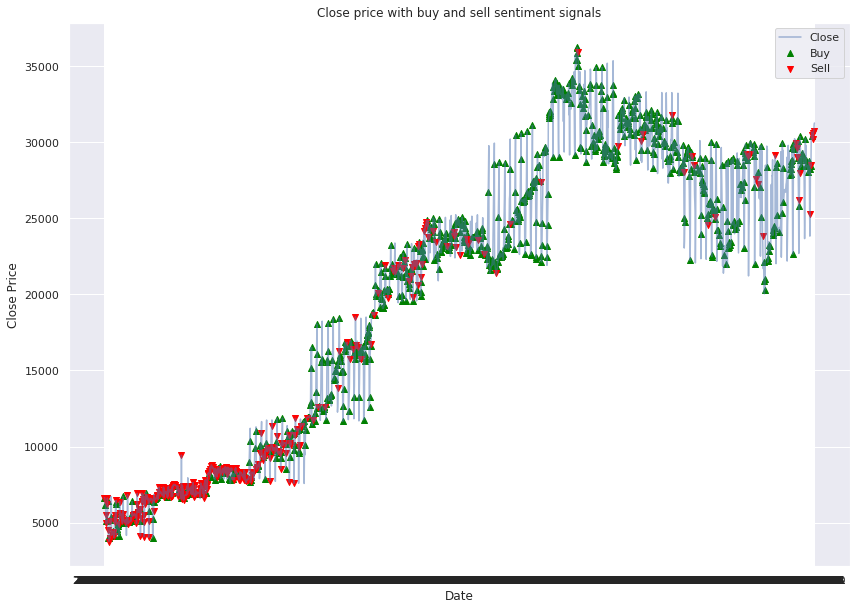

In [45]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_5['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_5.index,roberta_5['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_5.index,roberta_5['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [46]:
returns_5=roberta_5.sent_positions.shift(1)*roberta_5.Log_Returns

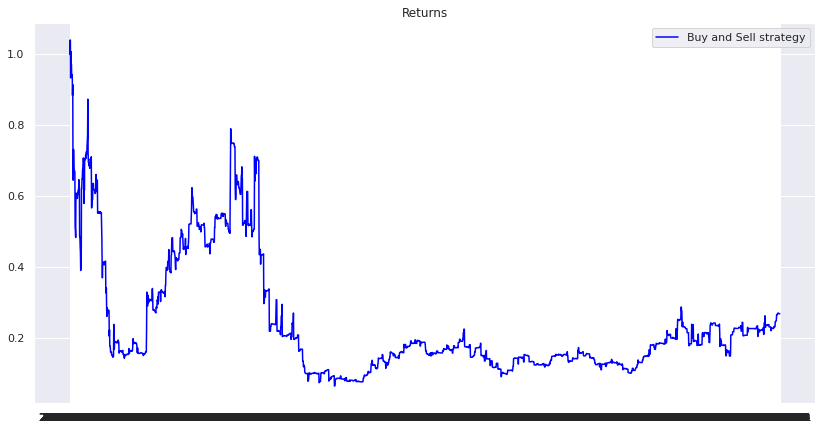

In [47]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns_5.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [48]:
print('Buy and Sell strategy Returns:',np.exp(returns_5.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: -0.7318318662822267


### Threshold 0.30

In [49]:
roberta_6=roberta_bt.copy()

In [50]:
roberta_6.drop(columns=['sent_positions'],inplace=True)

In [51]:
roberta_6['sent_positions'] = roberta_6['sentiments'].apply(lambda x:sentimentPositions(x,thresh=0.30,
                                                                   short=True))

In [52]:
#Calculating  Returns
roberta_6['Returns']=roberta_6.pct_change()['Close']
roberta_6['Log_Returns']=np.log(1+roberta_6['Returns'])
roberta_6.dropna(inplace=True)

In [53]:
roberta_6['Buy']=np.where(roberta_6.sent_positions>0,roberta_6['Close'],np.nan)
roberta_6['Sell']=np.where(roberta_6.sent_positions<0,roberta_6['Close'],np.nan)

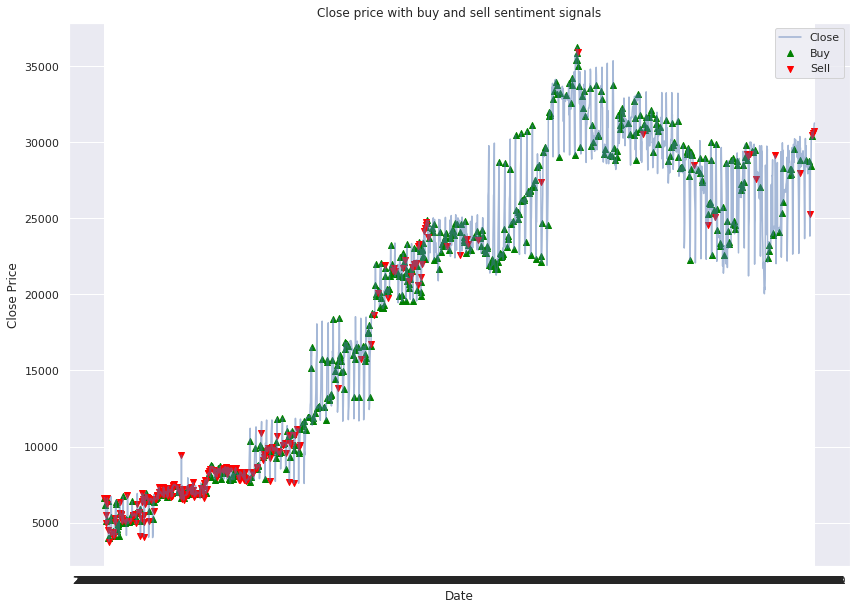

In [54]:
plt.figure(figsize=(14,10))
plt.title('Close price with buy and sell sentiment signals')
plt.plot(roberta_6['Close'],alpha=0.5,label='Close')
plt.scatter(roberta_6.index,roberta_6['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(roberta_6.index,roberta_6['Sell'],color='red',label='Sell',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [55]:
returns_6=roberta_6.sent_positions.shift(1)*roberta_6.Log_Returns

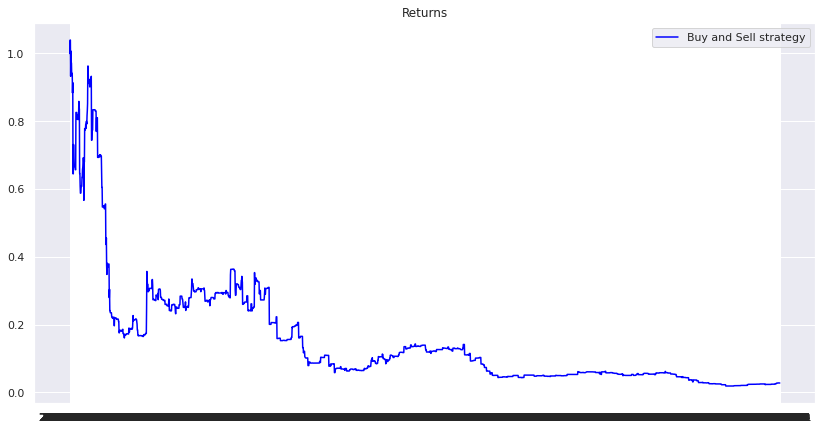

In [56]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(returns_6.dropna()).cumprod(),c='blue',label="Buy and Sell strategy")
plt.legend()

In [57]:
print('Buy and Sell strategy Returns:',np.exp(returns_6.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: -0.9723800018278144


## Random Trading

In [58]:
roberta_bt.head()

,Open,High,Low,Close,Change,Volume,sentiments,sent_positions
Date,,,,,,,,
2008-02-12,6641.67,6641.79,6641.67,6641.75,0.06,197300.0,-0.600000,-1
2008-03-12,6641.74,6641.84,6641.44,6641.80,0.05,41200.0,0.500000,1
2008-05-12,6641.68,6641.75,6641.18,6641.75,0.07,41700.0,-0.400000,-1
2008-12-12,6641.68,6641.78,6641.65,6641.77,0.02,56000.0,-0.333333,-1
2008-12-15,6638.75,6638.75,6389.69,6389.69,-252.08,17890248.0,0.200000,1


In [59]:
random_trading=roberta_bt.copy()

In [60]:
random_trading.drop(columns=['sent_positions'],inplace=True)

In [61]:
random_trading['random_positions'] = random.choices(
    [1,0,-1], k=len(random_trading)
)

In [62]:
random_trading['Returns']=random_trading.pct_change()['Close']
random_trading['Log_Returns']=np.log(1+random_trading['Returns'])
random_trading.dropna(inplace=True)

In [63]:
rand_returns=random_trading.random_positions*random_trading.Log_Returns

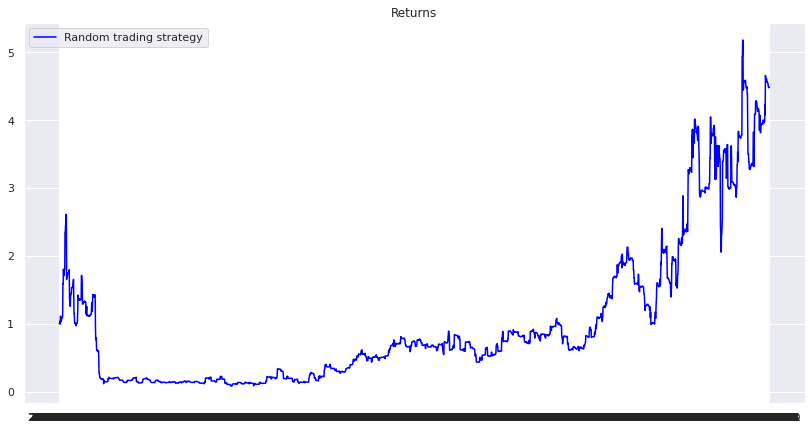

In [64]:
plt.figure(figsize=(14,7))
plt.title('Returns')
plt.plot(np.exp(rand_returns.dropna()).cumprod(),c='blue',label="Random trading strategy")
plt.legend()

In [65]:
print('Buy and Sell strategy Returns:',np.exp(rand_returns.dropna()).cumprod()[-1]-1)

Buy and Sell strategy Returns: 3.4859554439220988


In [66]:
a=rand_returns.to_frame('returns')
a_log=np.exp(a['returns'].dropna()).cumprod()
a_log=a_log.to_frame('returns').dropna()
b=returns.to_frame('returns')
b_log=np.exp(b['returns'].dropna()).cumprod()
b_log=b_log.to_frame('returns').dropna()
c=returns_1.to_frame('returns')
c_log=np.exp(c['returns'].dropna()).cumprod()
c_log=c_log.to_frame('returns').dropna()
d=returns_3.to_frame('returns')
d_log=np.exp(d['returns'].dropna()).cumprod()
d_log=d_log.to_frame('returns').dropna()
e=returns_4.to_frame('returns')
e_log=np.exp(e['returns'].dropna()).cumprod()
e_log=e_log.to_frame('returns').dropna()
f=returns_5.to_frame('returns')
f_log=np.exp(f['returns'].dropna()).cumprod()
f_log=f_log.to_frame('returns').dropna()
g=returns_6.to_frame('returns')
g_log=np.exp(g['returns'].dropna()).cumprod()
g_log=g_log.to_frame('returns').dropna()

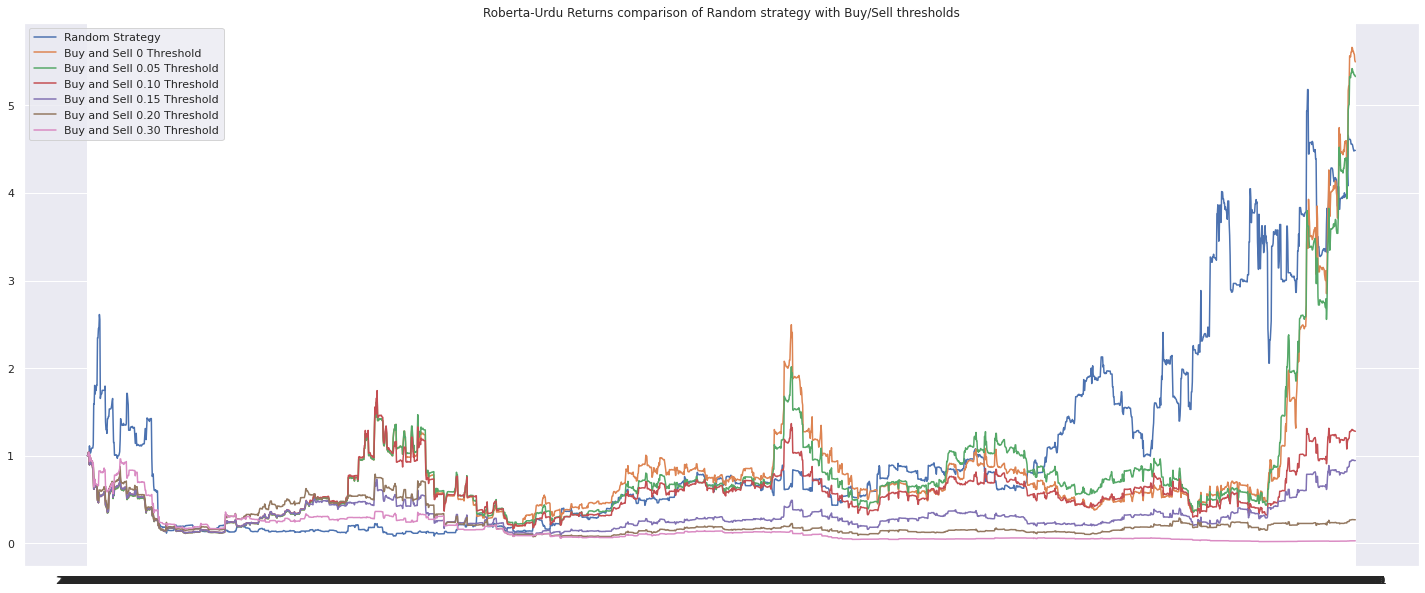

In [69]:
plt.figure(figsize=(25,10))
plt.title('Roberta-Urdu Returns comparison of Random strategy with Buy/Sell thresholds')
plt.plot(a_log.index,a_log.returns,label="Random Strategy")
plt.plot(b_log.index,b_log.returns,label="Buy and Sell 0 Threshold")
plt.plot(c_log.index,c_log.returns,label="Buy and Sell 0.05 Threshold")
plt.plot(d_log.index,d_log.returns,label="Buy and Sell 0.10 Threshold")
plt.plot(e_log.index,e_log.returns,label="Buy and Sell 0.15 Threshold")
plt.plot(f_log.index,f_log.returns,label="Buy and Sell 0.20 Threshold")
plt.plot(g_log.index,g_log.returns,label="Buy and Sell 0.30 Threshold")
plt.legend()

#Calculating  Returns
roberta_bt['Returns']=roberta_bt.pct_change()['Close']
roberta_bt['Log_Returns']=np.log(1+roberta_bt['Returns'])

From = '2020'
To   = '2021'

roberta_bt[From:To][['Close','sent_positions']].iplot(secondary_y='sent_positions',title='Buy and Sell',xTitle='Date',yTitle='Close')

roberta_bt['Buy_Sell']=roberta_bt['Returns']*roberta_bt['sent_positions']

roberta_bt['Buy_Sell_Equity']= (roberta_bt['Returns']+1).cumprod()

roberta_bt.dropna(inplace=True)

(roberta_bt[['Returns','Buy_Sell']]+1).cumprod().iplot(title="Buy and Sell Strategy with threshold 0")
print("Return with Buy[1] and Sell [-1] approach:",round(100*(roberta_bt['Buy_Sell_Equity'][-1]-1),2),'%')